<center>

# Курс "Основы Python для анализа данных"

## Артамонов Игорь Михайлович
## Факультет "Прикладная математика" МАИ

### Практическое занятие № 1. numpy
</center>


## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [2]:
import os
import skimage
import skimage.io
import skimage.transform
import skimage.color

In [3]:
PATH = 'pics'
image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa.jpg'))
bad_image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa-BAD.jpg'))

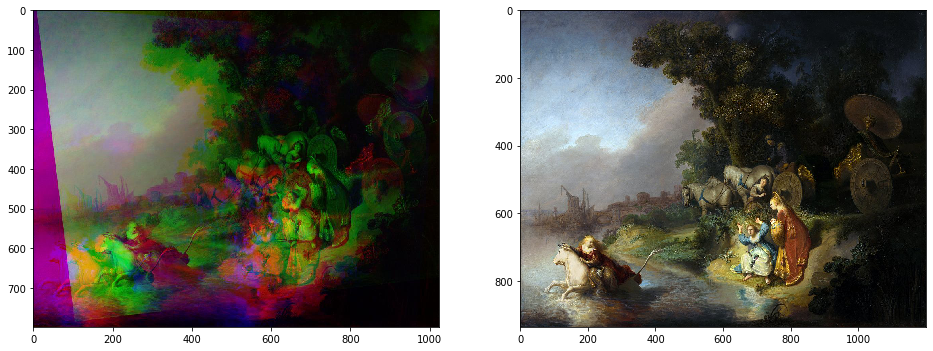

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].imshow(bad_image);
ax[1].imshow(image);

In [5]:
# Исследуйте свойства объекта bad_image



In [6]:
bad_image.shape

(799, 1024, 3)

In [7]:
image.shape

(936, 1200, 3)

In [8]:
bad_image.dtype

dtype('uint8')

In [9]:
image.dtype

dtype('uint8')

## Вопрос 1

* Тип данных, в которые считался файл изображения<br>
* Размер файла изображения<br>
* Размерность данных<br>
* Тип значений данных<br>

In [10]:
type(image)

imageio.core.util.Array

In [11]:
image.shape

(936, 1200, 3)

In [12]:
image.size

3369600

In [13]:
image.dtype

dtype('uint8')

### Вопрос 2
Какой слой Вы возьмете за основу и почему?

In [14]:
# Ваш код для определения

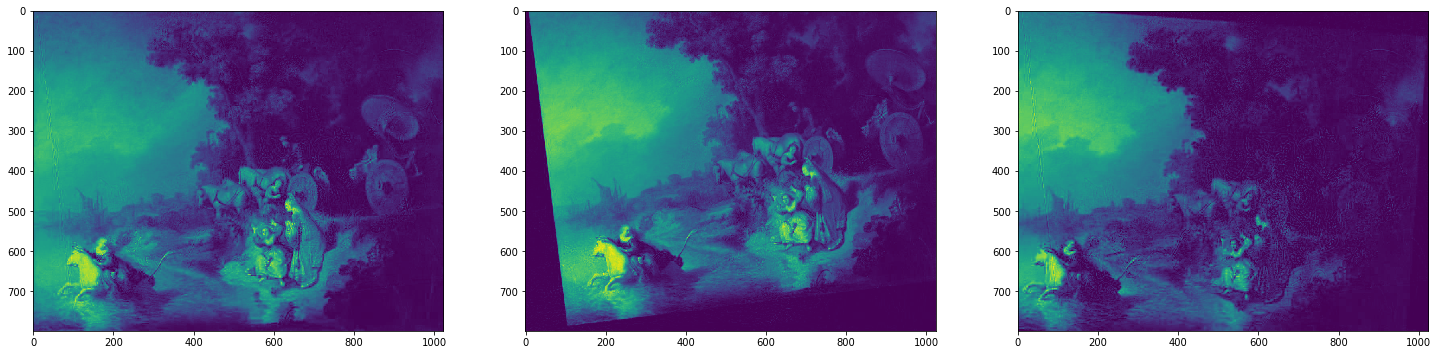

In [15]:

img = plt.imread(os.path.join(PATH,'The Abduction of Europa-BAD.jpg'), format=None)
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(25,25))


for c, ax in zip(range(3), ax):
    

    #print(split_img)
    ax.imshow(img[:,:,c])

За основу возьмем слой 0, так как он менее всех подвержен измененям. Можно судить, что сдвиг и поворот для него будут близки к нулю.

### Возможно следующее линейное преобразование двумерной матрицы:

$$
X = a_0 * x - b_0 * y + a_1 = x * \cos(rotation) - y * \sin(rotation) + a1 \\
Y = b_0 * x + a_0 * y + b_1 = x * \sin(rotation) + y * \cos(rotation) + b1
$$

где матрица преобразования:
$$
\begin{bmatrix}
    a_{0}  & b_{0} & a_{1} \\
    b_{0}  & a_{0} & b_{1} \\
    0      & 0     & 1
\end{bmatrix}
$$
а $rotation$ - угол поворота против часовой стрелки

In [16]:
image.shape

(936, 1200, 3)

In [17]:
bad_image.shape

(799, 1024, 3)

Приведем к одному размеру и масштабу

In [18]:
image_resized = skimage.transform.resize(image, (bad_image.shape[0], bad_image.shape[1]),
                       anti_aliasing=True)

In [19]:
bad_image_resized = skimage.transform.resize(bad_image, (bad_image.shape[0], bad_image.shape[1]),
                       anti_aliasing=True)

In [20]:
image_resized.shape

(799, 1024, 3)

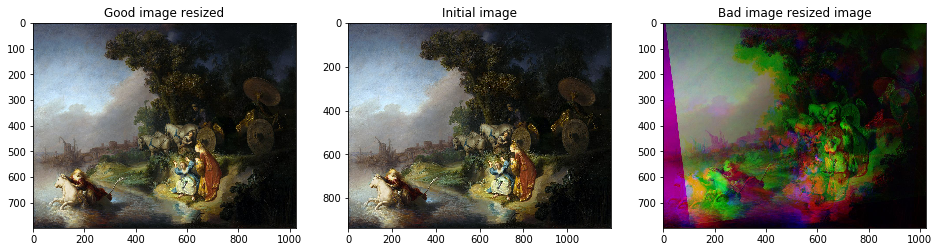

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 40))
ax[0].imshow(image_resized);
ax[1].imshow(image);
ax[2].imshow(bad_image_resized)
ax[0].set_title("Good image resized")
ax[1].set_title("Initial image")
ax[2].set_title("Bad image resized image");

In [22]:
alpha = np.arctan(100/800)

In [23]:
# Ваш код
def shift_and_rotate(shift, angle):
    """
    Поворачивает матрицу на величину сдвига shift и угол rotate
    """
    return np.array([[np.cos(angle), -np.sin(angle), shift[0]],
           [np.sin(angle), np.cos(angle), shift[1]],
           [0,0,1]])
    
r = shift_and_rotate((3,4),30)

In [24]:
# Ваш код
def mse_(image1, image2):
    """
    Возвращает среднеквадратичную ошибку между двумя изображениями
    """
    sq = (image1 - image2) ** 2
    return np.mean(sq)

In [25]:
# Ваш код
# В результате должно получиться изображение good_image, максимально близкое к оригиналу

def t_(image, r):  
    """
    Возвращает изображение координаты которого переместились после умножения на матрицу вращения
    """
    m = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            idx = np.array([i,j,0]) @ r
            idx = idx.astype('int')   
            if 0 <= idx[0]+ r[1][2].astype('int') < m.shape[0] and 0 <= idx[1]+ r[0][2].astype('int') < m.shape[1]:
                m[idx[0] +  r[1][2].astype('int'), idx[1] +  r[0][2].astype('int')] = image[i,j]               
    return m
        
            

In [26]:
#хорошее изображение имеет один цветовой канал
def get_min_al(image_g, layer, image_b, angle_start, step_an,  x_start, step, freq_shift,freq_angle):
    """
    Запускает процесс поиска оптимального угла и сдвига для вращения изображения
    """
    mse_val = []
    angles = np.linspace(angle_start - step_an, angle_start + step_an,freq_angle)
    ys = np.linspace(x_start - step, x_start + step, freq_shift)
    xs = np.linspace(x_start - step, x_start + step, freq_shift)
    xss = []
    yss = []
    angl = []
    new_old= None
    new_ = None
    
    for an in angles:
        print('angle: ', an)
        for y in ys:
            print('y: ', y)          
            for x in xs:
                print('x: ', x)
                r = shift_and_rotate((x,y), an)
                old =  image_b[:,:,layer].copy() if new_ is None else new_.copy()
                new_ = t_(image_b[:,:,layer],r)                
                mse = mse_(new_, image_g)
                #print("new_ == old is ",np.array_equal(new_, old))
                #print("new_ == image_g is ",np.array_equal(new_, image_g))
                print('mse: ', mse, '\n')
                mse_val.append(mse)
                xss.append(x)
                yss.append(y)
                angl.append(an)       
    return xss[np.argmin(mse_val)], yss[np.argmin(mse_val)],angl[np.argmin(mse_val)],mse_val

In [27]:
def get_recovered_l(image_g, layer, image_b,angle_start, step_an, x_start, step, freq_shift = 10,freq_angle=15):
    min_x, min_y, min_angl, _ = get_min_al(image_g, layer, image_b,angle_start, step_an, x_start, step,freq_shift,freq_angle)
    print('calculate shift matrix')
    r_layer= shift_and_rotate((min_x,min_y),min_angl)
    print('calculate recovered layer')
    img_layer = t_(image_b[:,:,layer], r_layer)
    print("min_x: {}, min_y: {}, min_angl: {}".format(min_x,min_y,min_angl))
    return img_layer

# Red layer

Возьмем за основу красный слой так как он лучше всего совпадает с начальным изображением и будем поворачивать остальные слои на основе начально красного слоя

In [28]:
layer = 0

In [29]:
img_red = bad_image_resized[:,:,0]

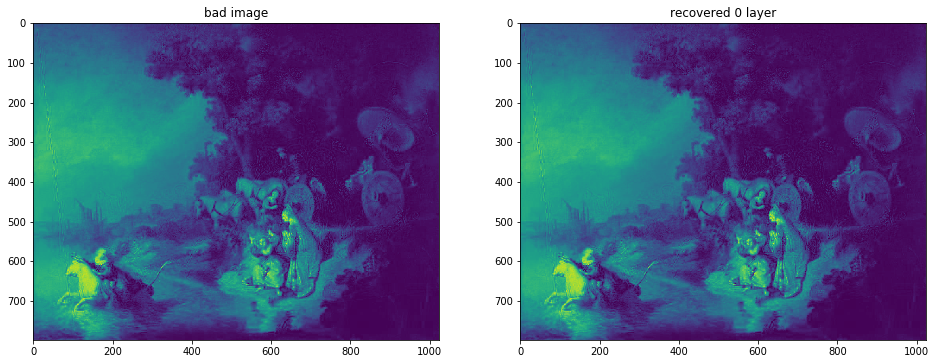

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('bad image')
ax[1].set_title('recovered {} layer'.format(layer))
ax[0].imshow(bad_image_resized[:,:,0]);
ax[1].imshow(img_red);

# Green layer

In [63]:
r_layer_g= shift_and_rotate((-4,4.0),0.09999999999999998)

img_green_ = t_(bad_image_resized[:,:,1], r_layer_g)

In [217]:
layer = 1

In [ ]:
#v2 min_x: -1.6666666666666665, min_y: 5.0, min_angl: -0.07142857142857142

In [415]:
#1 min_x: -4.0, min_y: 4.0, min_angl: 0.09999999999999998

In [416]:
img_green_ = get_recovered_l(img_red, layer, bad_image_resized, 0, 0.1, 0, 5, freq_shift = 10,freq_angle = 15)

angle:  -0.1
y:  -5.0
x:  -5.0
mse:  0.029289169484912 

x:  -3.888888888888889
mse:  0.02987770149778709 

x:  -2.7777777777777777
mse:  0.030162173228929067 

x:  -1.6666666666666665
mse:  0.030445596012460614 

x:  -0.5555555555555554
mse:  0.0307293824484564 

x:  0.5555555555555554
mse:  0.0307293824484564 

x:  1.666666666666667
mse:  0.03101628743881705 

x:  2.7777777777777786
mse:  0.031295751359560434 

x:  3.8888888888888893
mse:  0.031578174385459304 

x:  5.0
mse:  0.032145258947771434 

y:  -3.888888888888889
x:  -5.0
mse:  0.028742076015247878 

x:  -3.888888888888889
mse:  0.02934301433446684 

x:  -2.7777777777777777
mse:  0.029635007376729635 

x:  -1.6666666666666665
mse:  0.029925654451883416 

x:  -0.5555555555555554
mse:  0.030220024007265252 

x:  0.5555555555555554
mse:  0.030220024007265252 

x:  1.666666666666667
mse:  0.030511226588953767 

x:  2.7777777777777786
mse:  0.030801564915703274 

x:  3.8888888888888893
mse:  0.03109400156998903 

x:  5.0
mse:  0.0

mse:  0.024261782377433375 

x:  -3.888888888888889
mse:  0.02475902555454852 

x:  -2.7777777777777777
mse:  0.02503412887868879 

x:  -1.6666666666666665
mse:  0.025323745031906063 

x:  -0.5555555555555554
mse:  0.025624401900996793 

x:  0.5555555555555554
mse:  0.025624401900996793 

x:  1.666666666666667
mse:  0.025941025927076592 

x:  2.7777777777777786
mse:  0.02627194549673762 

x:  3.8888888888888893
mse:  0.02661519316124185 

x:  5.0
mse:  0.02731450412412365 

y:  2.7777777777777786
x:  -5.0
mse:  0.023954995331895382 

x:  -3.888888888888889
mse:  0.024449509433257917 

x:  -2.7777777777777777
mse:  0.024722126248195985 

x:  -1.6666666666666665
mse:  0.025011616202899555 

x:  -0.5555555555555554
mse:  0.02531606068147812 

x:  0.5555555555555554
mse:  0.02531606068147812 

x:  1.666666666666667
mse:  0.02564074184546314 

x:  2.7777777777777786
mse:  0.025978567578976867 

x:  3.8888888888888893
mse:  0.026326548063671778 

x:  5.0
mse:  0.027034192827539435 

y:  3.88

mse:  0.02181102605624492 

x:  -3.888888888888889
mse:  0.02180587627721751 

x:  -2.7777777777777777
mse:  0.021809428537943026 

x:  -1.6666666666666665
mse:  0.02181677893409734 

x:  -0.5555555555555554
mse:  0.02182690284051221 

x:  0.5555555555555554
mse:  0.02182690284051221 

x:  1.666666666666667
mse:  0.02183882296116116 

x:  2.7777777777777786
mse:  0.0218576601287339 

x:  3.8888888888888893
mse:  0.021879253871080032 

x:  5.0
mse:  0.02192758714997921 

y:  -1.6666666666666665
x:  -5.0
mse:  0.021684526463027442 

x:  -3.888888888888889
mse:  0.021663901934288844 

x:  -2.7777777777777777
mse:  0.021656499303152464 

x:  -1.6666666666666665
mse:  0.021651778437423292 

x:  -0.5555555555555554
mse:  0.021650137236466357 

x:  0.5555555555555554
mse:  0.021650137236466357 

x:  1.666666666666667
mse:  0.0216462492170202 

x:  2.7777777777777786
mse:  0.02164820811343122 

x:  3.8888888888888893
mse:  0.02165256224409918 

x:  5.0
mse:  0.021662935464944487 

y:  -0.55555

mse:  0.021944718194094808 

x:  -2.7777777777777777
mse:  0.021975142768600193 

x:  -1.6666666666666665
mse:  0.0219975409183924 

x:  -0.5555555555555554
mse:  0.02201974757124421 

x:  0.5555555555555554
mse:  0.02201974757124421 

x:  1.666666666666667
mse:  0.022043820511022827 

x:  2.7777777777777786
mse:  0.02207033669086774 

x:  3.8888888888888893
mse:  0.022102624695258817 

x:  5.0
mse:  0.02216582344105385 

y:  5.0
x:  -5.0
mse:  0.02190735881014024 

x:  -3.888888888888889
mse:  0.021979844762820906 

x:  -2.7777777777777777
mse:  0.022011726691446364 

x:  -1.6666666666666665
mse:  0.022037723961197724 

x:  -0.5555555555555554
mse:  0.02206467059563937 

x:  0.5555555555555554
mse:  0.02206467059563937 

x:  1.666666666666667
mse:  0.022102387504456814 

x:  2.7777777777777786
mse:  0.02214637922742824 

x:  3.8888888888888893
mse:  0.022194163559709462 

x:  5.0
mse:  0.02228278651295528 

angle:  -0.028571428571428567
y:  -5.0
x:  -5.0
mse:  0.022117976028312093 

x

mse:  0.02246793516435367 

x:  -2.7777777777777777
mse:  0.022484779884078543 

x:  -1.6666666666666665
mse:  0.022525005049444092 

x:  -0.5555555555555554
mse:  0.022584245458748 

x:  0.5555555555555554
mse:  0.022584245458748 

x:  1.666666666666667
mse:  0.02265427700634643 

x:  2.7777777777777786
mse:  0.022726210422311405 

x:  3.8888888888888893
mse:  0.022799767709023377 

x:  5.0
mse:  0.022958245900356344 

y:  0.5555555555555554
x:  -5.0
mse:  0.022508724219414095 

x:  -3.888888888888889
mse:  0.02246793516435367 

x:  -2.7777777777777777
mse:  0.022484779884078543 

x:  -1.6666666666666665
mse:  0.022525005049444092 

x:  -0.5555555555555554
mse:  0.022584245458748 

x:  0.5555555555555554
mse:  0.022584245458748 

x:  1.666666666666667
mse:  0.02265427700634643 

x:  2.7777777777777786
mse:  0.022726210422311405 

x:  3.8888888888888893
mse:  0.022799767709023377 

x:  5.0
mse:  0.022958245900356344 

y:  1.666666666666667
x:  -5.0
mse:  0.022528627721196164 

x:  -3.8

mse:  0.02502800052548488 

x:  -1.6666666666666665
mse:  0.02484774752682475 

x:  -0.5555555555555554
mse:  0.024661799054283125 

x:  0.5555555555555554
mse:  0.024661799054283125 

x:  1.666666666666667
mse:  0.024478427952369878 

x:  2.7777777777777786
mse:  0.024315628317174938 

x:  3.8888888888888893
mse:  0.024186758394828724 

x:  5.0
mse:  0.024009650960849817 

y:  -3.888888888888889
x:  -5.0
mse:  0.02559909513297315 

x:  -3.888888888888889
mse:  0.025257119866769085 

x:  -2.7777777777777777
mse:  0.02508646017311727 

x:  -1.6666666666666665
mse:  0.024910547865754012 

x:  -0.5555555555555554
mse:  0.024730124346850155 

x:  0.5555555555555554
mse:  0.024730124346850155 

x:  1.666666666666667
mse:  0.024553447480245946 

x:  2.7777777777777786
mse:  0.02439281306870137 

x:  3.8888888888888893
mse:  0.024258233612823952 

x:  5.0
mse:  0.024076025270257883 

y:  -2.7777777777777777
x:  -5.0
mse:  0.025632773106665736 

x:  -3.888888888888889
mse:  0.02528853331583603

mse:  0.02709003356466928 

x:  -1.6666666666666665
mse:  0.02690071461064346 

x:  -0.5555555555555554
mse:  0.02671053033028822 

x:  0.5555555555555554
mse:  0.02671053033028822 

x:  1.666666666666667
mse:  0.026527117218592706 

x:  2.7777777777777786
mse:  0.026350943661133813 

x:  3.8888888888888893
mse:  0.02618716898547114 

x:  5.0
mse:  0.02591471319863361 

y:  2.7777777777777786
x:  -5.0
mse:  0.027692003200547516 

x:  -3.888888888888889
mse:  0.027329593831154835 

x:  -2.7777777777777777
mse:  0.027143269958447024 

x:  -1.6666666666666665
mse:  0.026953496584512425 

x:  -0.5555555555555554
mse:  0.026763887114515817 

x:  0.5555555555555554
mse:  0.026763887114515817 

x:  1.666666666666667
mse:  0.026582668210400996 

x:  2.7777777777777786
mse:  0.026410309611080138 

x:  3.8888888888888893
mse:  0.026251284747484314 

x:  5.0
mse:  0.025980971346764505 

y:  3.8888888888888893
x:  -5.0
mse:  0.027741317854275332 

x:  -3.888888888888889
mse:  0.02737891626656044 


mse:  0.03010075344234342 

x:  -0.5555555555555554
mse:  0.029935999854170427 

x:  0.5555555555555554
mse:  0.029935999854170427 

x:  1.666666666666667
mse:  0.029776099570619625 

x:  2.7777777777777786
mse:  0.029616988375511504 

x:  3.8888888888888893
mse:  0.02945094415660489 

x:  5.0
mse:  0.029125730492784687 

y:  -1.6666666666666665
x:  -5.0
mse:  0.030792928305951272 

x:  -3.888888888888889
mse:  0.030467270879737517 

x:  -2.7777777777777777
mse:  0.030303399121065708 

x:  -1.6666666666666665
mse:  0.03014205492276588 

x:  -0.5555555555555554
mse:  0.02997750627090435 

x:  0.5555555555555554
mse:  0.02997750627090435 

x:  1.666666666666667
mse:  0.029817150326887434 

x:  2.7777777777777786
mse:  0.029656543207604105 

x:  3.8888888888888893
mse:  0.02948917433661893 

x:  5.0
mse:  0.029157330796100202 

y:  -0.5555555555555554
x:  -5.0
mse:  0.03084148699035784 

x:  -3.888888888888889
mse:  0.03051143457026957 

x:  -2.7777777777777777
mse:  0.030347172881873753 

mse:  0.03172516886917453 

x:  0.5555555555555554
mse:  0.03172516886917453 

x:  1.666666666666667
mse:  0.0315730976489437 

x:  2.7777777777777786
mse:  0.03142152233210686 

x:  3.8888888888888893
mse:  0.03126839049174894 

x:  5.0
mse:  0.03096215203569877 

y:  5.0
x:  -5.0
mse:  0.03254733021311344 

x:  -3.888888888888889
mse:  0.032261928515086684 

x:  -2.7777777777777777
mse:  0.032114739282667185 

x:  -1.6666666666666665
mse:  0.03196394893787825 

x:  -0.5555555555555554
mse:  0.0318105489491741 

x:  0.5555555555555554
mse:  0.0318105489491741 

x:  1.666666666666667
mse:  0.031657926489173864 

x:  2.7777777777777786
mse:  0.03150760637200151 

x:  3.8888888888888893
mse:  0.031357715168127374 

x:  5.0
mse:  0.031055123725067784 

angle:  0.08571428571428572
y:  -5.0
x:  -5.0
mse:  0.03346761142776132 

x:  -3.888888888888889
mse:  0.0332163454126925 

x:  -2.7777777777777777
mse:  0.03309030655494836 

x:  -1.6666666666666665
mse:  0.03296737484220093 

x:  -0.55555

mse:  0.03396985643804427 

x:  2.7777777777777786
mse:  0.033853329140099024 

x:  3.8888888888888893
mse:  0.03373600805463031 

x:  5.0
mse:  0.033498410612987334 

y:  0.5555555555555554
x:  -5.0
mse:  0.03468100098330318 

x:  -3.888888888888889
mse:  0.03444142393170102 

x:  -2.7777777777777777
mse:  0.034322972830080095 

x:  -1.6666666666666665
mse:  0.034207699040130254 

x:  -0.5555555555555554
mse:  0.03408977333333436 

x:  0.5555555555555554
mse:  0.03408977333333436 

x:  1.666666666666667
mse:  0.03396985643804427 

x:  2.7777777777777786
mse:  0.033853329140099024 

x:  3.8888888888888893
mse:  0.03373600805463031 

x:  5.0
mse:  0.033498410612987334 

y:  1.666666666666667
x:  -5.0
mse:  0.03470114654413492 

x:  -3.888888888888889
mse:  0.03446239566612108 

x:  -2.7777777777777777
mse:  0.034343854022611475 

x:  -1.6666666666666665
mse:  0.03422694134365244 

x:  -0.5555555555555554
mse:  0.034106195492918226 

x:  0.5555555555555554
mse:  0.034106195492918226 

x:

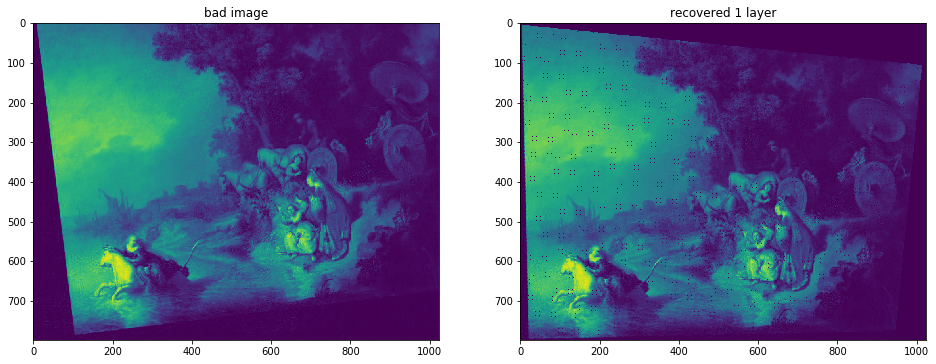

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('bad image')
ax[1].set_title('recovered {} layer'.format(1))
ax[0].imshow(bad_image_resized[:,:,1]);
ax[1].imshow(img_green_);

# Blue layer

In [88]:
r_layer_b= shift_and_rotate((7.142857142857142,  4.2857142857142865), -0.06)

img_bluу = t_(bad_image_resized[:,:,2], r_layer_b)

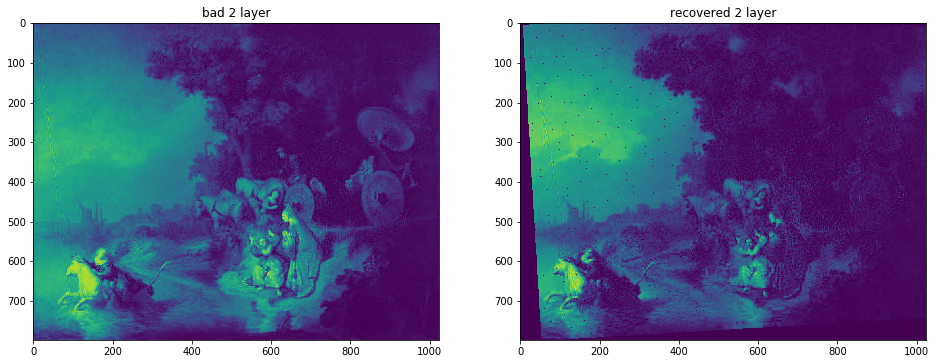

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('bad {} layer'.format(layer))
ax[1].set_title('recovered {} layer'.format(layer))
ax[0].imshow(img_red);
ax[1].imshow(img_bluу);

In [54]:
layer = 2

min_x: 10.0, min_y: 10.0, min_angl: -0.059

In [56]:
#v2 min_x: 7.142857142857142, min_y: 4.2857142857142865, min_angl: -0.06

In [55]:
img_bluу =  get_recovered_l(img_red, layer, bad_image_resized, 0, 0.06, 10, 20, freq_shift = 15,freq_angle=10)

angle:  -0.06
y:  -10.0
x:  -10.0
mse:  0.023275182772438854 

x:  -7.142857142857142
mse:  0.023430547484414223 

x:  -4.285714285714286
mse:  0.02367515146227559 

x:  -1.4285714285714288
mse:  0.023972846331577074 

x:  1.4285714285714288
mse:  0.024225585207732582 

x:  4.2857142857142865
mse:  0.024680732083104 

x:  7.142857142857142
mse:  0.025228211648042207 

x:  10.0
mse:  0.025941659739093643 

x:  12.857142857142858
mse:  0.02651000032810845 

x:  15.714285714285715
mse:  0.027466322646585897 

x:  18.571428571428573
mse:  0.028486025903618793 

x:  21.42857142857143
mse:  0.029556165766909063 

x:  24.285714285714285
mse:  0.03063980498032775 

x:  27.142857142857146
mse:  0.031740359324497876 

x:  30.0
mse:  0.03279788264456971 

y:  -7.142857142857142
x:  -10.0
mse:  0.02271105652583663 

x:  -7.142857142857142
mse:  0.022791757185999583 

x:  -4.285714285714286
mse:  0.02295412743798821 

x:  -1.4285714285714288
mse:  0.02318044860823586 

x:  1.4285714285714288
mse:  

mse:  0.029250444867617176 

x:  30.0
mse:  0.030334847324534196 

y:  21.42857142857143
x:  -10.0
mse:  0.022571813758571552 

x:  -7.142857142857142
mse:  0.022730748813335314 

x:  -4.285714285714286
mse:  0.02295087683945312 

x:  -1.4285714285714288
mse:  0.0231866609810043 

x:  1.4285714285714288
mse:  0.02338194336929459 

x:  4.2857142857142865
mse:  0.023755029839689145 

x:  7.142857142857142
mse:  0.024177588533388604 

x:  10.0
mse:  0.02472078646507728 

x:  12.857142857142858
mse:  0.02516081833356653 

x:  15.714285714285715
mse:  0.025899274707029813 

x:  18.571428571428573
mse:  0.026698508201993484 

x:  21.42857142857143
mse:  0.027589680415590442 

x:  24.285714285714285
mse:  0.028560882542558313 

x:  27.142857142857146
mse:  0.029594365816417074 

x:  30.0
mse:  0.03064893354624589 

y:  24.285714285714285
x:  -10.0
mse:  0.022966294260378647 

x:  -7.142857142857142
mse:  0.02316039629596331 

x:  -4.285714285714286
mse:  0.023436110726162248 

x:  -1.42857142

mse:  0.02466874585578651 

x:  24.285714285714285
mse:  0.025743767236980023 

x:  27.142857142857146
mse:  0.02686793557110611 

x:  30.0
mse:  0.0280083615405994 

y:  10.0
x:  -10.0
mse:  0.02200604896129396 

x:  -7.142857142857142
mse:  0.022030415631214644 

x:  -4.285714285714286
mse:  0.022095336608915772 

x:  -1.4285714285714288
mse:  0.022204937687331505 

x:  1.4285714285714288
mse:  0.022327498792975145 

x:  4.2857142857142865
mse:  0.022525739290215775 

x:  7.142857142857142
mse:  0.02271926207950955 

x:  10.0
mse:  0.022956364068870288 

x:  12.857142857142858
mse:  0.023195011078402324 

x:  15.714285714285715
mse:  0.023665535507697854 

x:  18.571428571428573
mse:  0.02431256624576119 

x:  21.42857142857143
mse:  0.025143064999579984 

x:  24.285714285714285
mse:  0.026090355515610945 

x:  27.142857142857146
mse:  0.027091661213477208 

x:  30.0
mse:  0.02814988804233239 

y:  12.857142857142858
x:  -10.0
mse:  0.022138387143597477 

x:  -7.142857142857142
mse: 

mse:  0.023027573093336903 

x:  18.571428571428573
mse:  0.023319770827558938 

x:  21.42857142857143
mse:  0.02377969304040405 

x:  24.285714285714285
mse:  0.02444159620000282 

x:  27.142857142857146
mse:  0.025346037358398868 

x:  30.0
mse:  0.026403431491341615 

y:  -1.4285714285714288
x:  -10.0
mse:  0.02198490198875308 

x:  -7.142857142857142
mse:  0.0219540594967985 

x:  -4.285714285714286
mse:  0.022012784868051447 

x:  -1.4285714285714288
mse:  0.022144839000319338 

x:  1.4285714285714288
mse:  0.02225903121224178 

x:  4.2857142857142865
mse:  0.02242055920098949 

x:  7.142857142857142
mse:  0.022582650026837976 

x:  10.0
mse:  0.02275150888236024 

x:  12.857142857142858
mse:  0.02286295656795243 

x:  15.714285714285715
mse:  0.02306334084223872 

x:  18.571428571428573
mse:  0.023357166845547346 

x:  21.42857142857143
mse:  0.023810718758916806 

x:  24.285714285714285
mse:  0.024429763237904384 

x:  27.142857142857146
mse:  0.025278816556577193 

x:  30.0
mse

mse:  0.02663008456706365 

x:  15.714285714285715
mse:  0.027116867026449165 

x:  18.571428571428573
mse:  0.027640502008138855 

x:  21.42857142857143
mse:  0.028202463876925238 

x:  24.285714285714285
mse:  0.028798381247115718 

x:  27.142857142857146
mse:  0.029444897792962634 

x:  30.0
mse:  0.030133136499740715 

y:  30.0
x:  -10.0
mse:  0.024377855387044088 

x:  -7.142857142857142
mse:  0.02447312857340642 

x:  -4.285714285714286
mse:  0.024702228460496155 

x:  -1.4285714285714288
mse:  0.02503587875998624 

x:  1.4285714285714288
mse:  0.02529991522256755 

x:  4.2857142857142865
mse:  0.025741654492663916 

x:  7.142857142857142
mse:  0.02623733840199478 

x:  10.0
mse:  0.02674821722137758 

x:  12.857142857142858
mse:  0.02708874067837687 

x:  15.714285714285715
mse:  0.027602205777845213 

x:  18.571428571428573
mse:  0.028144798467928066 

x:  21.42857142857143
mse:  0.028700182168700954 

x:  24.285714285714285
mse:  0.02929625079290392 

x:  27.142857142857146
ms

mse:  0.02438364245540833 

x:  10.0
mse:  0.024785566789892185 

x:  12.857142857142858
mse:  0.02507844215036055 

x:  15.714285714285715
mse:  0.025546960429288612 

x:  18.571428571428573
mse:  0.025989441045166834 

x:  21.42857142857143
mse:  0.026406309264806763 

x:  24.285714285714285
mse:  0.026847806851779902 

x:  27.142857142857146
mse:  0.027307020725186645 

x:  30.0
mse:  0.02783369219649425 

y:  18.571428571428573
x:  -10.0
mse:  0.023767845041247074 

x:  -7.142857142857142
mse:  0.023527862740917567 

x:  -4.285714285714286
mse:  0.023519731714666 

x:  -1.4285714285714288
mse:  0.023750921414557574 

x:  1.4285714285714288
mse:  0.023976748373080326 

x:  4.2857142857142865
mse:  0.02434593129826578 

x:  7.142857142857142
mse:  0.0247243067532571 

x:  10.0
mse:  0.025145264507723825 

x:  12.857142857142858
mse:  0.025454440528343125 

x:  15.714285714285715
mse:  0.02593696270710224 

x:  18.571428571428573
mse:  0.026395922078293336 

x:  21.42857142857143
mse:

mse:  0.023019107285773475 

x:  4.2857142857142865
mse:  0.02326744718323397 

x:  7.142857142857142
mse:  0.02357368622197016 

x:  10.0
mse:  0.0239168042294372 

x:  12.857142857142858
mse:  0.024141307268937977 

x:  15.714285714285715
mse:  0.0244800026707318 

x:  18.571428571428573
mse:  0.02484843462641794 

x:  21.42857142857143
mse:  0.02521622795822833 

x:  24.285714285714285
mse:  0.025582038296741383 

x:  27.142857142857146
mse:  0.02597555317503865 

x:  30.0
mse:  0.026377018503310864 

y:  7.142857142857142
x:  -10.0
mse:  0.024401517495587357 

x:  -7.142857142857142
mse:  0.02386672935841907 

x:  -4.285714285714286
mse:  0.023309565044360346 

x:  -1.4285714285714288
mse:  0.023103312520390083 

x:  1.4285714285714288
mse:  0.02324562826093634 

x:  4.2857142857142865
mse:  0.023484943667720054 

x:  7.142857142857142
mse:  0.023813039672511947 

x:  10.0
mse:  0.02418819405799187 

x:  12.857142857142858
mse:  0.024425873395214875 

x:  15.714285714285715
mse:  0

mse:  0.02389646388230849 

x:  1.4285714285714288
mse:  0.023551361152282402 

x:  4.2857142857142865
mse:  0.023387527117831184 

x:  7.142857142857142
mse:  0.023604339134209305 

x:  10.0
mse:  0.023843544883243688 

x:  12.857142857142858
mse:  0.02403928133431262 

x:  15.714285714285715
mse:  0.024348455663262825 

x:  18.571428571428573
mse:  0.024689886118040013 

x:  21.42857142857143
mse:  0.02500757091461749 

x:  24.285714285714285
mse:  0.02534408009726794 

x:  27.142857142857146
mse:  0.025722787702085883 

x:  30.0
mse:  0.026101800728358854 

y:  -4.285714285714286
x:  -10.0
mse:  0.02554465218441528 

x:  -7.142857142857142
mse:  0.025001918653482953 

x:  -4.285714285714286
mse:  0.024460090654215335 

x:  -1.4285714285714288
mse:  0.023935576812843556 

x:  1.4285714285714288
mse:  0.023573854223506573 

x:  4.2857142857142865
mse:  0.023289860746011165 

x:  7.142857142857142
mse:  0.023691481068764186 

x:  10.0
mse:  0.02396378195510255 

x:  12.857142857142858


mse:  0.027144737782119104 

x:  -4.285714285714286
mse:  0.02668999835464488 

x:  -1.4285714285714288
mse:  0.026215652520072498 

x:  1.4285714285714288
mse:  0.025917945508346234 

x:  4.2857142857142865
mse:  0.02585859491499594 

x:  7.142857142857142
mse:  0.026143858234491574 

x:  10.0
mse:  0.02648909539582093 

x:  12.857142857142858
mse:  0.026736525833185205 

x:  15.714285714285715
mse:  0.027140952747727553 

x:  18.571428571428573
mse:  0.027582374547925715 

x:  21.42857142857143
mse:  0.028027242522401453 

x:  24.285714285714285
mse:  0.0285213901894439 

x:  27.142857142857146
mse:  0.029038338303983238 

x:  30.0
mse:  0.02958082334752334 

y:  27.142857142857146
x:  -10.0
mse:  0.027877617944371366 

x:  -7.142857142857142
mse:  0.0274183894286289 

x:  -4.285714285714286
mse:  0.026980083250569185 

x:  -1.4285714285714288
mse:  0.026522115216258 

x:  1.4285714285714288
mse:  0.02623540619636264 

x:  4.2857142857142865
mse:  0.026199088824175223 

x:  7.1428571

mse:  0.02814499212644562 

x:  -7.142857142857142
mse:  0.027618257781437033 

x:  -4.285714285714286
mse:  0.02710311044863829 

x:  -1.4285714285714288
mse:  0.026600668039369498 

x:  1.4285714285714288
mse:  0.026290163269073193 

x:  4.2857142857142865
mse:  0.025894138367373466 

x:  7.142857142857142
mse:  0.02566823047188317 

x:  10.0
mse:  0.025664842603800052 

x:  12.857142857142858
mse:  0.025750622331222675 

x:  15.714285714285715
mse:  0.026026898113612862 

x:  18.571428571428573
mse:  0.02638917660420737 

x:  21.42857142857143
mse:  0.026769920696658334 

x:  24.285714285714285
mse:  0.027192159928049315 

x:  27.142857142857146
mse:  0.027621175215144053 

x:  30.0
mse:  0.02808318288004405 

y:  15.714285714285715
x:  -10.0
mse:  0.028320124912694665 

x:  -7.142857142857142
mse:  0.027802151853449624 

x:  -4.285714285714286
mse:  0.02731201928779421 

x:  -1.4285714285714288
mse:  0.02684978819100078 

x:  1.4285714285714288
mse:  0.02654738572617426 

x:  4.285

mse:  0.026657415473536058 

x:  30.0
mse:  0.02705710050805994 

y:  1.4285714285714288
x:  -10.0
mse:  0.0290705300711997 

x:  -7.142857142857142
mse:  0.028558084766244544 

x:  -4.285714285714286
mse:  0.028038665104376255 

x:  -1.4285714285714288
mse:  0.02749934788036403 

x:  1.4285714285714288
mse:  0.027131878785128204 

x:  4.2857142857142865
mse:  0.02661601546278757 

x:  7.142857142857142
mse:  0.0262174038110942 

x:  10.0
mse:  0.025954829232546852 

x:  12.857142857142858
mse:  0.02585692187306757 

x:  15.714285714285715
mse:  0.025839103560191857 

x:  18.571428571428573
mse:  0.025935294758977438 

x:  21.42857142857143
mse:  0.026124528885196827 

x:  24.285714285714285
mse:  0.026410682887261838 

x:  27.142857142857146
mse:  0.026797890527747656 

x:  30.0
mse:  0.027196378706394166 

y:  4.2857142857142865
x:  -10.0
mse:  0.02919125075365721 

x:  -7.142857142857142
mse:  0.02868446176984236 

x:  -4.285714285714286
mse:  0.028158043672970985 

x:  -1.428571428

mse:  0.029323389469379325 

x:  27.142857142857146
mse:  0.02978774445670851 

x:  30.0
mse:  0.030261321051755462 

angle:  0.04666666666666666
y:  -10.0
x:  -10.0
mse:  0.030248926906632695 

x:  -7.142857142857142
mse:  0.02972103718923194 

x:  -4.285714285714286
mse:  0.02919967020948772 

x:  -1.4285714285714288
mse:  0.02868530367595315 

x:  1.4285714285714288
mse:  0.028349625572731314 

x:  4.2857142857142865
mse:  0.027867756359442542 

x:  7.142857142857142
mse:  0.02740054628581029 

x:  10.0
mse:  0.02698351203824785 

x:  12.857142857142858
mse:  0.026759731228668253 

x:  15.714285714285715
mse:  0.026514775778360082 

x:  18.571428571428573
mse:  0.026401572497388198 

x:  21.42857142857143
mse:  0.02639404092347492 

x:  24.285714285714285
mse:  0.02648020926487894 

x:  27.142857142857146
mse:  0.026638650765789106 

x:  30.0
mse:  0.02686813892852641 

y:  -7.142857142857142
x:  -10.0
mse:  0.030291563414704098 

x:  -7.142857142857142
mse:  0.0297875771318397 

x:

mse:  0.02817210525871783 

x:  21.42857142857143
mse:  0.028232506735699835 

x:  24.285714285714285
mse:  0.028377270904097557 

x:  27.142857142857146
mse:  0.028620037390999213 

x:  30.0
mse:  0.028943065794288556 

y:  21.42857142857143
x:  -10.0
mse:  0.03160864174039621 

x:  -7.142857142857142
mse:  0.031151242370045962 

x:  -4.285714285714286
mse:  0.030678581795011994 

x:  -1.4285714285714288
mse:  0.030197713072412532 

x:  1.4285714285714288
mse:  0.02987790011853396 

x:  4.2857142857142865
mse:  0.029447386181797142 

x:  7.142857142857142
mse:  0.029075804469849687 

x:  10.0
mse:  0.028785176942872 

x:  12.857142857142858
mse:  0.028642784193789746 

x:  15.714285714285715
mse:  0.028507458862216596 

x:  18.571428571428573
mse:  0.028463776771076605 

x:  21.42857142857143
mse:  0.028527978206730753 

x:  24.285714285714285
mse:  0.028669427925483625 

x:  27.142857142857146
mse:  0.02892627293361927 

x:  30.0
mse:  0.029252695107037225 

y:  24.285714285714285
x:

mse:  0.028620223944506584 

x:  18.571428571428573
mse:  0.02840003364617015 

x:  21.42857142857143
mse:  0.02828257158827771 

x:  24.285714285714285
mse:  0.02825757039207971 

x:  27.142857142857146
mse:  0.028318174117498925 

x:  30.0
mse:  0.0284446747445142 

y:  10.0
x:  -10.0
mse:  0.03236818905456101 

x:  -7.142857142857142
mse:  0.03190889210140591 

x:  -4.285714285714286
mse:  0.03144345773521912 

x:  -1.4285714285714288
mse:  0.030969926232551428 

x:  1.4285714285714288
mse:  0.03064645124742008 

x:  4.2857142857142865
mse:  0.030184295429900913 

x:  7.142857142857142
mse:  0.02973412061432141 

x:  10.0
mse:  0.029325644163527963 

x:  12.857142857142858
mse:  0.02909758089366065 

x:  15.714285714285715
mse:  0.028804046139379407 

x:  18.571428571428573
mse:  0.028588582871966153 

x:  21.42857142857143
mse:  0.02849207410930073 

x:  24.285714285714285
mse:  0.028487386287507674 

x:  27.142857142857146
mse:  0.028564067466740256 

x:  30.0
mse:  0.028680052340

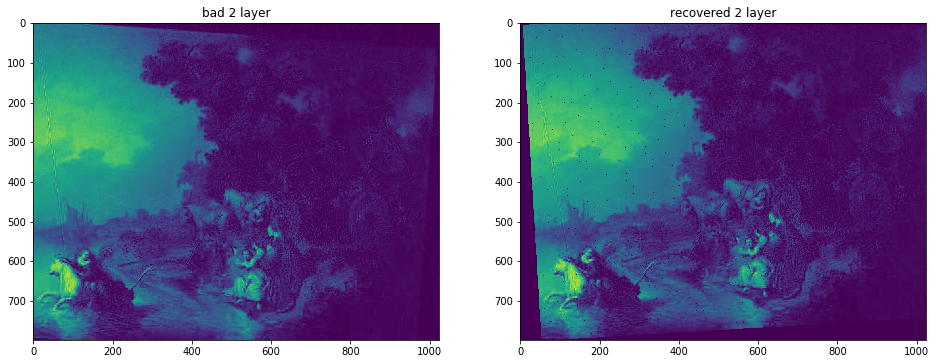

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('bad {} layer'.format(layer))
ax[1].set_title('recovered {} layer'.format(layer))
ax[0].imshow(bad_image_resized[:,:,2]);
ax[1].imshow(img_bluу);

In [60]:
def images(f,s,t):
    res = np.zeros((f.shape[0], f.shape[1],3))
    for x in range(f.shape[0]):
        for z in range(f.shape[1]):
            res[x,z,:3] =(f[x,z],s[x,z],t[x,z])
    return res

In [90]:
recovered_image = images(img_red,img_green_,img_bluу)

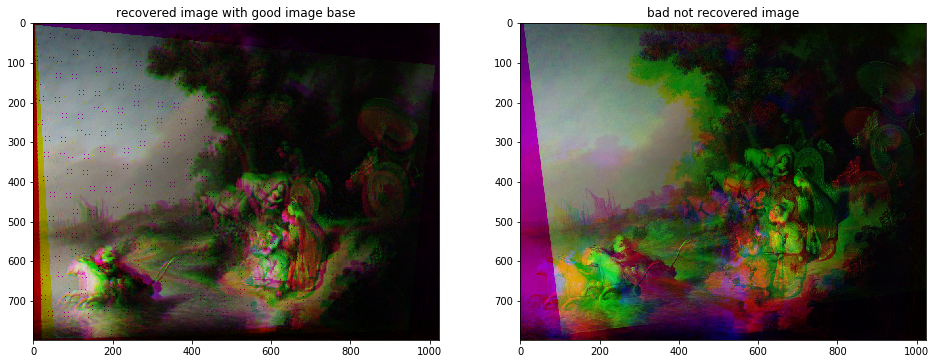

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('recovered image with good image base')
ax[1].set_title('bad not recovered image')
ax[0].imshow(recovered_image);
ax[1].imshow(bad_image);

### Вопрос 3:
Каковы значения (градусах и пикселях) для:
* Слой 0. Угол поворота $\alpha_0$, сдвиг $y_0$, сдвиг $x_0$
* Слой 1. Угол поворота $\alpha_1$, сдвиг $y_1$, сдвиг $x_1$
* Слой 2. Угол поворота$\alpha_2$, сдвиг $y_2$, сдвиг $x_2$

Красный слой:  $\alpha_0$ -1.1102230246251565e-16, сдвиг $y_0$ -5, сдвиг $x_0$  -5 

 Зеленый слой: $\alpha_0$ 0.09999999999999987 , сдвиг $y_0$ -5, сдвиг $x_0$ -5 

 Второй способ поиска Черный слой: $\alpha_0$ 0.0 , сдвиг $y_0$ -5, сдвиг $x_0$ -5 
 Первый способ поиска Черный слой: $\alpha_0$ 0.0  -1.1102230246251565e-16

### Вопрос 4:
* Какой слой отвечает за какой цвет?
* Как Вы это определили?

In [330]:
#0 - Red 1 - Green 2 - Blue

In [5]:

img = plt.imread(os.path.join(PATH,'The Abduction of Europa.jpg'), format=None)

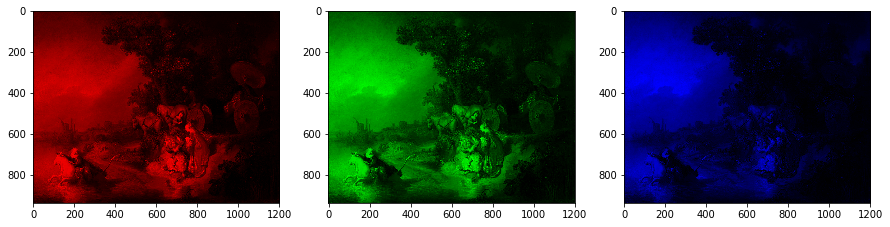

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))


for c, ax in zip(range(3), ax):
    
    split_img = np.zeros(img.shape, dtype="uint8")
    split_img[:,:,c] = img[:,:,c]
    #print(split_img)
    ax.imshow(split_img)

### Вопрос 5:
* Можно ли было лучше восстановить изображение?
* Если да, то как?
* Если нет, то почему?

Да, можно было. Могу предположить, что основное из-за чего качество восстановленного изображения плохое - это несовершенная системы оценки схожести и грубые настройки поиска.

Во первых, MSE оценивает схожесть глобально, то есть если какой то один участок фотографии сильно отличается, а остальные полностью совпадают, скорее всего, MSE будет для такого случая больше, чем когда на каждый пиксель есть маленькое расхождение. То есть, когда только какая то частьизображения отличатся, но сильно, а все остальные части изображения в целом схожи, мы все равно получим высокую MSE. Большие значения разности, возведенные в кадрат, приведут к тому, что значение MSE может "прыгать" в разные стороноы.Чтобы понизить влияние таких экстремальных разностей возможно применить методы регуляризации. Далее, MSE не имеет как таковой размерности. Понятно, что чем оно больше , тем хуже, но насколько больше может считаться критически хуже, трудно при таком подходе сравнивать два не сильно отличающиеся результата.

MSE менее вероятно уловит структуру в изменении изображения. Для того, чтобы решить эту проблему, возможно стоит оценивать локальные изменения на участках изображения.

Также необходима более точная настройка параметров. Необходимо расширить диапазон проверяемых углов и сдвигов. Но для этого необходимо либо увеличить мощности машины, чтобы расчет шел быстрее, либо использовать более эффективный алгоритм

Также,необходимо разобраться, почему изменения в сдиге никак не влияло на MSE. Возможна ошибка в расчетах.